In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from pygoogle_image import image as pi
import random
import PIL
import pickle

ModuleNotFoundError: No module named 'cv2'

In [ ]:
data = r"C:\Users\puroh\Downloads\dataset_train"
categories = ['Real', 'AIGenerated']

In [ ]:
img_size = 48

In [ ]:
import os
import cv2 as cv

img_size = 48
training_data = []

for category in categories:
    path = os.path.join(data, category)
    classes = categories.index(category)

    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path, img))

        # Check if the image was successfully loaded
        if img_array is not None and img_array.size != 0:
            new_array = cv.resize(img_array, (img_size, img_size))
            new_array = new_array / 255
            training_data.append([new_array, classes])
        else:
            print(f"Failed to load or process image: {os.path.join(path, img)}")

print(f"Total number of images loaded: {len(training_data)}")



Failed to load or process image: C:\Users\puroh\Downloads\dataset_train\AIGenerated\ai generated characters_34.gif
Failed to load or process image: C:\Users\puroh\Downloads\dataset_train\AIGenerated\ai generated characters_36.gif
Total number of images loaded: 1013


In [ ]:
len(training_data), training_data[0][0].shape

(1013, (48, 48, 3))

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [ ]:
X_train.shape

(1013, 48, 48, 3)

In [ ]:
y_train.shape

(1013,)

In [ ]:
X_train[0].shape

(48, 48, 3)

In [ ]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [ ]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [ ]:
X_train.shape


(1013, 48, 48, 3)

In [ ]:
y_train.shape

(1013,)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [ ]:
#training the model
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
32/32 [==============================] - 4s 49ms/step - loss: 0.6971 - accuracy: 0.4896
Epoch 2/15
32/32 [==============================] - 1s 47ms/step - loss: 0.6930 - accuracy: 0.4946
Epoch 3/15
32/32 [==============================] - 2s 49ms/step - loss: 0.6930 - accuracy: 0.5212
Epoch 4/15
32/32 [==============================] - 2s 47ms/step - loss: 0.6863 - accuracy: 0.5568
Epoch 5/15
32/32 [==============================] - 1s 45ms/step - loss: 0.6789 - accuracy: 0.5617
Epoch 6/15
32/32 [==============================] - 1s 45ms/step - loss: 0.6583 - accuracy: 0.6199
Epoch 7/15
32/32 [==============================] - 1s 44ms/step - loss: 0.6460 - accuracy: 0.6397
Epoch 8/15
32/32 [==============================] - 1s 44ms/step - loss: 0.5981 - accuracy: 0.6851
Epoch 9/15
32/32 [==============================] - 1s 44ms/step - loss: 0.5718 - accuracy: 0.7088
Epoch 10/15
32/32 [==============================] - 2s 56ms/step - loss: 0.5731 - accuracy: 0.7068
Epoch 11/

In [ ]:
pip install h5py


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade h5py


In [ ]:
import h5py


In [ ]:
model.save("AIGeneratedModel.h5")

In [ ]:
model_new = keras.models.load_model("AIGeneratedModel.h5")

In [ ]:
import os
import cv2 as cv
data = r"C:\Users\puroh\Downloads\dataset_train"
categories = ['Real', 'AIGenerated']

img_size = 48
testing_data = []

for category in categories:
    path = os.path.join(data, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv.imread(os.path.join(path,img))
            if img_array is not None:
                new_array = cv.resize(img_array, (48,48))
                new_array = new_array / 255
                testing_data.append([new_array, class_num])
            else:
                print(f"Unable to read: {os.path.join(path,img)}")
        except Exception as e:
            print(f"Error processing image: {os.path.join(path,img)}. Error: {e}")


random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

Unable to read: C:\Users\puroh\Downloads\dataset_train\AIGenerated\ai generated characters_34.gif
Unable to read: C:\Users\puroh\Downloads\dataset_train\AIGenerated\ai generated characters_36.gif


In [ ]:
model_new.evaluate(X_test, y_test)

32/32 [==============================] - 1s 13ms/step - loss: 0.2904 - accuracy: 0.8855


[0.2904057502746582, 0.8854886293411255]

In [ ]:
y_pred = model_new.predict(X_test)

32/32 [==============================] - 1s 14ms/step


In [ ]:
X_test.shape

(1013, 48, 48, 3)

In [ ]:
y_test.shape

(1013,)

In [ ]:
y_pred.shape

(1013, 1)

In [ ]:
y_predicted = [int(pred[0] + 0.5) for pred in y_pred]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       507
           1       0.89      0.87      0.88       506

    accuracy                           0.89      1013
   macro avg       0.89      0.89      0.89      1013
weighted avg       0.89      0.89      0.89      1013



In [ ]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(cv.cvtColor(img_arr, cv.COLOR_BGR2RGB))
    new_arr = cv.resize(img_arr, (48, 48))
    new_arr = new_arr / 255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)

    predicted_class = int(y[0][0] + 0.5)

    if predicted_class == 0:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")


1/1 [==============================] - 0s 26ms/step
The given image is AI Generated.


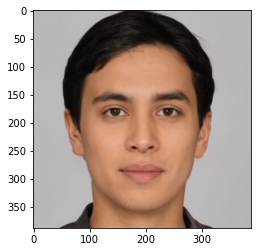

In [ ]:

path_img = r"C:\Users\puroh\Downloads\dataset_train\AIGenerated\7.jpg"
find_out(path_img)

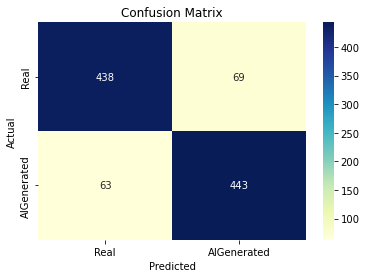

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already predicted the labels as y_predicted
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Real', 'AIGenerated'], yticklabels=['Real', 'AIGenerated'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:

import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold

X_data = np.concatenate((X_train, X_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)


def create_model():
    model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')

])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


acc_per_fold = []

# Perform cross-validation
fold_no = 1
for train_index, test_index in kfold.split(X_data, y_data):
    X_train_fold, X_test_fold = X_data[train_index], X_data[test_index]
    y_train_fold, y_test_fold = y_data[train_index], y_data[test_index]

    model = create_model()

    model.fit(X_train_fold, y_train_fold, epochs=15, batch_size=32, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)

    fold_no += 1

# Print mean accuracy across all folds
print('Average accuracy:', np.mean(acc_per_fold))


Score for fold 1: accuracy of 82.019704580307%
Score for fold 2: accuracy of 77.0370364189148%
Score for fold 3: accuracy of 87.16049194335938%
Score for fold 4: accuracy of 85.92592477798462%
Score for fold 5: accuracy of 81.4814805984497%
Average accuracy: 82.7249276638031
